## IMPORTAÇÃO DAS BIBLIOTECAS

In [212]:
import numpy as np
import pandas as pd
import openpyxl #biblioteca para ler o arquivo .xlsx
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

In [213]:
pio.renderers.default = 'notebook'  # Configura o renderizador para notebook


## LEITURA DO ARQUIVO PRINCIPAL COM OS DADOS - ANP

In [214]:

# Não é obrigatório. Permite que nosso dataframe exiba todas as linhas na visualização 
#pd.set_option('display.max_rows', None)

# delimiter = ';' --> o delimitador das colunas é o ';'
# thousands = '.', decimal = ',', dtype = {'Valor de Venda':np.float64,'empenhada': np.float64} --> formata a coluna 'Valor de Venda' como float

df_anp = pd.read_csv(r'C:\Users\User\Downloads\Dados_trabalho_modulo_2\ca-2022-02\ca-2022-02.csv', sep=';', thousands = '.', decimal = ',', dtype = {'Valor de Venda' : np.float64})

#df_anp = pd.read_csv(r'C:\Users\User\Downloads\Dados_trabalho_modulo_2\ca-2022-02\ca-2022-02.csv', sep=';', thousands = '.', decimal = ',', dtype = {'Regiao - Sigla': 'category','Produto':'category', 'Valor de Venda' : np.float64})

df_anp.rename(columns={'Regiao - Sigla': 'Regiao', 'Estado - Sigla': 'Estado'}, inplace=True)
df_anp['Data da Coleta']=pd.to_datetime(df_anp['Data da Coleta'], format="%d/%m/%Y")
#display(df_anp)
df_anp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378078 entries, 0 to 378077
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Regiao             378078 non-null  object        
 1   Estado             378078 non-null  object        
 2   Municipio          378078 non-null  object        
 3   Revenda            378078 non-null  object        
 4   CNPJ da Revenda    378078 non-null  object        
 5   Nome da Rua        378078 non-null  object        
 6   Numero Rua         377902 non-null  object        
 7   Complemento        81264 non-null   object        
 8   Bairro             377177 non-null  object        
 9   Cep                378078 non-null  object        
 10  Produto            378078 non-null  object        
 11  Data da Coleta     378078 non-null  datetime64[ns]
 12  Valor de Venda     378078 non-null  float64       
 13  Valor de Compra    0 non-null       float64 

In [215]:
# Criando colunas de mês e ano
df_anp['Ano'] = df_anp['Data da Coleta'].dt.year
df_anp['Mes'] = df_anp['Data da Coleta'].dt.month


display(df_anp)
df_anp.info()


,Regiao,Estado,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Ano,Mes
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,2022-07-01,7.48,NaN,R$ / litro,VIBRA ENERGIA,2022,7
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA,2022-07-01,7.38,NaN,R$ / litro,VIBRA ENERGIA,2022,7
2,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,DIESEL S10,2022-07-01,7.69,NaN,R$ / litro,VIBRA ENERGIA,2022,7
3,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,ETANOL,2022-07-01,5.99,NaN,R$ / litro,VIBRA ENERGIA,2022,7
4,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,GASOLINA,2022-07-01,7.39,NaN,R$ / litro,VIBRA ENERGIA,2022,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378073,S,SC,BLUMENAU,POSTO DE COMBUSTIVEIS MAX LTDA,31.603.614/0001-91,RUA BENJAMIN CONSTANT,1320,NaN,ESCOLA AGRICOLA,89037-500,GASOLINA,2022-12-30,5.04,NaN,R$ / litro,MAXSUL,2022,12
378074,S,SC,BLUMENAU,POSTO DE COMBUSTIVEIS MAX LTDA,31.603.614/0001-91,RUA BENJAMIN CONSTANT,1320,NaN,ESCOLA AGRICOLA,89037-500,DIESEL S10,2022-12-30,6.19,NaN,R$ / litro,MAXSUL,2022,12
378075,S,SC,BLUMENAU,REDE DE POSTOS R4 LTDA,03.283.593/0006-43,RUA DAS MISSOES,2426,NaN,NOVA ESPERANCA,89051-305,GASOLINA ADITIVADA,2022-12-30,5.31,NaN,R$ / litro,VIBRA ENERGIA,2022,12
378076,S,SC,BLUMENAU,REDE DE POSTOS R4 LTDA,03.283.593/0006-43,RUA DAS MISSOES,2426,NaN,NOVA ESPERANCA,89051-305,GASOLINA,2022-12-30,5.11,NaN,R$ / litro,VIBRA ENERGIA,2022,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378078 entries, 0 to 378077
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Regiao             378078 non-null  object        
 1   Estado             378078 non-null  object        
 2   Municipio          378078 non-null  object        
 3   Revenda            378078 non-null  object        
 4   CNPJ da Revenda    378078 non-null  object        
 5   Nome da Rua        378078 non-null  object        
 6   Numero Rua         377902 non-null  object        
 7   Complemento        81264 non-null   object        
 8   Bairro             377177 non-null  object        
 9   Cep                378078 non-null  object        
 10  Produto            378078 non-null  object        
 11  Data da Coleta     378078 non-null  datetime64[ns]
 12  Valor de Venda     378078 non-null  float64       
 13  Valor de Compra    0 non-null       float64 

## Leitura do arquivo IPCA

Fonte: IBGE 
https://www.ibge.gov.br/estatisticas/economicas/precos-e-custos/9256-indice-nacional-de-precos-ao-consumidor-amplo.html?t=series-historicas&utm_source=landing&utm_medium=explica&utm_campaign=inflacao#plano-real-mes

Ao desflacionar os preços dos combustíveis usando o IPCA, estamos removendo o efeito da inflação e tornando os preços comparáveis em termos reais ao longo do tempo. Isso permite uma análise mais precisa das variações nos preços dos combustíveis, ajudando a identificar padrões, tendências e comportamentos que podem ser influenciados por fatores econômicos, políticos ou outros.

In [216]:
# LÊ o arquivo XLSX e seleciona a área útil do arquivo
arquivo_excel = r'C:\Users\User\Downloads\Dados_trabalho_modulo_2\IPCA_20230815231854.xlsx'

df_ipca = pd.read_excel(arquivo_excel, thousands = '.', decimal = ',')

# Selecionar apenas o intervalo de células C2:MN4
df_ipca = df_ipca.iloc[0:3, 2:351]  # Linhas 1 a 3, colunas C a MM

display(df_ipca)
df_ipca.info()


,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,Unnamed: 341,Unnamed: 342,Unnamed: 343,Unnamed: 344,Unnamed: 345,Unnamed: 346,Unnamed: 347,Unnamed: 348,Unnamed: 349,Unnamed: 350
0,julho 1994,agosto 1994,setembro 1994,outubro 1994,novembro 1994,dezembro 1994,janeiro 1995,fevereiro 1995,março 1995,abril 1995,...,outubro 2022,novembro 2022,dezembro 2022,janeiro 2023,fevereiro 2023,março 2023,abril 2023,maio 2023,junho 2023,julho 2023
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.84,1.86,1.53,2.62,2.81,1.71,1.70,1.02,1.55,2.43,...,0.59,0.41,0.62,0.53,0.84,0.71,0.61,0.23,-0.08,0.12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Columns: 349 entries, Unnamed: 2 to Unnamed: 350
dtypes: object(349)
memory usage: 8.3+ KB


In [217]:
# Exclui linha sem dado 
df_ipca = df_ipca.dropna(how='all')
display(df_ipca)

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,Unnamed: 341,Unnamed: 342,Unnamed: 343,Unnamed: 344,Unnamed: 345,Unnamed: 346,Unnamed: 347,Unnamed: 348,Unnamed: 349,Unnamed: 350
0,julho 1994,agosto 1994,setembro 1994,outubro 1994,novembro 1994,dezembro 1994,janeiro 1995,fevereiro 1995,março 1995,abril 1995,...,outubro 2022,novembro 2022,dezembro 2022,janeiro 2023,fevereiro 2023,março 2023,abril 2023,maio 2023,junho 2023,julho 2023
2,6.84,1.86,1.53,2.62,2.81,1.71,1.70,1.02,1.55,2.43,...,0.59,0.41,0.62,0.53,0.84,0.71,0.61,0.23,-0.08,0.12


In [218]:
#Inverte as linhas com as colunas - Transpõe- Refaz o índice existente - renomeia as colunas e transforma o tipo de dado do IPCA em float64

df_ipca_T=df_ipca.transpose()
df_ipca_T.reset_index(inplace=True, drop=True)
df_ipca_T.columns = ['Mês_Ano', 'IPCA']
df_ipca_T['IPCA']=df_ipca_T['IPCA'].astype(float)
#df_ipca_T['Mês_Ano'] = pd.to_datetime(df_ipca_T['Mês_Ano'],format='%B %Y')
display(df_ipca_T)

,Mês_Ano,IPCA
0,julho 1994,6.84
1,agosto 1994,1.86
2,setembro 1994,1.53
3,outubro 1994,2.62
4,novembro 1994,2.81
...,...,...
344,março 2023,0.71
345,abril 2023,0.61
346,maio 2023,0.23
347,junho 2023,-0.08


In [219]:
## Convertendo 

In [220]:
# Mapeando nomes dos meses para números
meses_dict = {
    'janeiro': 1, 'fevereiro': 2, 'março': 3, 'abril': 4, 'maio': 5, 'junho': 6,
    'julho': 7, 'agosto': 8, 'setembro': 9, 'outubro': 10, 'novembro': 11, 'dezembro': 12
}

# Convertendo a coluna 'MesAno' em formato de data
df_ipca_T['Mês_Ano'] = df_ipca_T['Mês_Ano'].apply(lambda x: pd.to_datetime(f"{meses_dict[x.split()[0].lower()]} {x.split()[1]}"))

# Exibindo o DataFrame resultante
display(df_ipca_T)







,Mês_Ano,IPCA
0,1994-07-01,6.84
1,1994-08-01,1.86
2,1994-09-01,1.53
3,1994-10-01,2.62
4,1994-11-01,2.81
...,...,...
344,2023-03-01,0.71
345,2023-04-01,0.61
346,2023-05-01,0.23
347,2023-06-01,-0.08


In [221]:
# Criando colunas de mês e ano
df_ipca_T['Ano'] = df_ipca_T['Mês_Ano'].dt.year
df_ipca_T['Mes'] = df_ipca_T['Mês_Ano'].dt.month


df_ipca_T.iloc[334:349]


,Mês_Ano,IPCA,Ano,Mes
334,2022-05-01,0.47,2022,5
335,2022-06-01,0.67,2022,6
336,2022-07-01,-0.68,2022,7
337,2022-08-01,-0.36,2022,8
338,2022-09-01,-0.29,2022,9
339,2022-10-01,0.59,2022,10
340,2022-11-01,0.41,2022,11
341,2022-12-01,0.62,2022,12
342,2023-01-01,0.53,2023,1
343,2023-02-01,0.84,2023,2


In [222]:
df_anp_ipca = pd.merge(df_anp, df_ipca_T, on=['Mes', 'Ano'], how='inner')


In [244]:
df_anp_ipca = df_anp_ipca.drop('Mês_Ano', axis=1)

In [245]:
display(df_anp_ipca)

,Regiao,Estado,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Ano,Mes,IPCA,Valor Venda Real
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,2022-07-01,7.48,NaN,R$ / litro,VIBRA ENERGIA,2022,7,-0.68,7.420635
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA,2022-07-01,7.38,NaN,R$ / litro,VIBRA ENERGIA,2022,7,-0.68,7.321429
2,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,DIESEL S10,2022-07-01,7.69,NaN,R$ / litro,VIBRA ENERGIA,2022,7,-0.68,7.628968
3,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,ETANOL,2022-07-01,5.99,NaN,R$ / litro,VIBRA ENERGIA,2022,7,-0.68,5.942460
4,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,GASOLINA,2022-07-01,7.39,NaN,R$ / litro,VIBRA ENERGIA,2022,7,-0.68,7.331349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378073,S,SC,BLUMENAU,POSTO DE COMBUSTIVEIS MAX LTDA,31.603.614/0001-91,RUA BENJAMIN CONSTANT,1320,NaN,ESCOLA AGRICOLA,89037-500,GASOLINA,2022-12-30,5.04,NaN,R$ / litro,MAXSUL,2022,12,0.62,5.065327
378074,S,SC,BLUMENAU,POSTO DE COMBUSTIVEIS MAX LTDA,31.603.614/0001-91,RUA BENJAMIN CONSTANT,1320,NaN,ESCOLA AGRICOLA,89037-500,DIESEL S10,2022-12-30,6.19,NaN,R$ / litro,MAXSUL,2022,12,0.62,6.221106
378075,S,SC,BLUMENAU,REDE DE POSTOS R4 LTDA,03.283.593/0006-43,RUA DAS MISSOES,2426,NaN,NOVA ESPERANCA,89051-305,GASOLINA ADITIVADA,2022-12-30,5.31,NaN,R$ / litro,VIBRA ENERGIA,2022,12,0.62,5.336683
378076,S,SC,BLUMENAU,REDE DE POSTOS R4 LTDA,03.283.593/0006-43,RUA DAS MISSOES,2426,NaN,NOVA ESPERANCA,89051-305,GASOLINA,2022-12-30,5.11,NaN,R$ / litro,VIBRA ENERGIA,2022,12,0.62,5.135678


### Deflacionando os valores para jul/23

1. Calcule a taxa de variação entre a Data da Coleta e julho de 2023 usando os índices do IPCA:

        *Taxa de Variação = Índice IPCA (Data da Coleta / Índice IPCA Julho 2022) - 1*

2. Para cada valor da  coluna Valor de Venda que você deseja deflacionar, Aplique a fórmula:

        Valor Real Julho 2023 = Valor Nominal / (1 + Taxa de Variação)

In [225]:
ipca_julho23 = df_ipca_T['IPCA'].iloc[-1]
df_anp_ipca['Valor Venda Real']=df_anp_ipca['Valor de Venda']/(1+(ipca_julho23-df_anp_ipca['IPCA'])/100)


### Dataframe com o Valor do IPCA - Visualização

In [246]:
df_anp = df_anp_ipca.copy()
display(df_anp)

,Regiao,Estado,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Ano,Mes,IPCA,Valor Venda Real
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,2022-07-01,7.48,NaN,R$ / litro,VIBRA ENERGIA,2022,7,-0.68,7.420635
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA,2022-07-01,7.38,NaN,R$ / litro,VIBRA ENERGIA,2022,7,-0.68,7.321429
2,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,DIESEL S10,2022-07-01,7.69,NaN,R$ / litro,VIBRA ENERGIA,2022,7,-0.68,7.628968
3,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,ETANOL,2022-07-01,5.99,NaN,R$ / litro,VIBRA ENERGIA,2022,7,-0.68,5.942460
4,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,GASOLINA,2022-07-01,7.39,NaN,R$ / litro,VIBRA ENERGIA,2022,7,-0.68,7.331349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378073,S,SC,BLUMENAU,POSTO DE COMBUSTIVEIS MAX LTDA,31.603.614/0001-91,RUA BENJAMIN CONSTANT,1320,NaN,ESCOLA AGRICOLA,89037-500,GASOLINA,2022-12-30,5.04,NaN,R$ / litro,MAXSUL,2022,12,0.62,5.065327
378074,S,SC,BLUMENAU,POSTO DE COMBUSTIVEIS MAX LTDA,31.603.614/0001-91,RUA BENJAMIN CONSTANT,1320,NaN,ESCOLA AGRICOLA,89037-500,DIESEL S10,2022-12-30,6.19,NaN,R$ / litro,MAXSUL,2022,12,0.62,6.221106
378075,S,SC,BLUMENAU,REDE DE POSTOS R4 LTDA,03.283.593/0006-43,RUA DAS MISSOES,2426,NaN,NOVA ESPERANCA,89051-305,GASOLINA ADITIVADA,2022-12-30,5.31,NaN,R$ / litro,VIBRA ENERGIA,2022,12,0.62,5.336683
378076,S,SC,BLUMENAU,REDE DE POSTOS R4 LTDA,03.283.593/0006-43,RUA DAS MISSOES,2426,NaN,NOVA ESPERANCA,89051-305,GASOLINA,2022-12-30,5.11,NaN,R$ / litro,VIBRA ENERGIA,2022,12,0.62,5.135678


## Amostragem
Mostra o universo de dados que estamos analisando

In [247]:
inicio = df_anp['Data da Coleta'].min()
fim = df_anp['Data da Coleta'].max()
n_revendas = df_anp['Revenda'].nunique()
n_revendas_r = df_anp.groupby('Regiao')['Revenda'].nunique()
n_produtos = df_anp.groupby('Produto')['Produto'].count()

print('Data Inicial da Amostragem:',inicio.strftime('%d/%m/%y'))
print('Data Final da Amostragem:',inicio.strftime('%d/%m/%y'))
print("-" * 50)
print(f'Quantidade de revendas analisadas:{n_revendas}\n')
print('Quantidade de revendas por região:')
for regiao, contagem in n_revendas_r.items():
    print(f"{regiao}: {contagem}")
print("-" * 50)
print('Combustíveis Analisados:\n')
for produto, quantidade in n_produtos.items():
    print(f"{produto} ------------------> {quantidade} de registros")
   

Data Inicial da Amostragem: 01/07/22
Data Final da Amostragem: 01/07/22
--------------------------------------------------
Quantidade de revendas analisadas:11640

Quantidade de revendas por região:
CO: 960
N: 661
NE: 2065
S: 1887
SE: 6225
--------------------------------------------------
Combustíveis Analisados:

DIESEL ------------------> 41762 de registros
DIESEL S10 ------------------> 74662 de registros
ETANOL ------------------> 84528 de registros
GASOLINA ------------------> 96323 de registros
GASOLINA ADITIVADA ------------------> 73068 de registros
GNV ------------------> 7735 de registros


## Análises


### Gera os Dataframes por produto

In [248]:
gasolina_df = df_anp[df_anp['Produto'] == 'GASOLINA'].reset_index()
etanol_df = df_anp[df_anp['Produto'] == 'ETANOL'].reset_index()
diesel_df = df_anp[df_anp['Produto'] == 'DIESEL'].reset_index()
gasolinaad_df = df_anp[df_anp['Produto'] == 'GASOLINA ADITIVADA'].reset_index()
dieselS10_df = df_anp[df_anp['Produto'] == 'DIESEL S10'].reset_index()
gnv_df = df_anp[df_anp['Produto'] == 'GNV'].reset_index()

### Evolução dos valores reais dos combustíveis ao longo do tempo

Como estamos fazendo análise global, o useja, de todos os estados, estamos utilizando a média por dia do valor real. Para vermos como se comportam os preços.

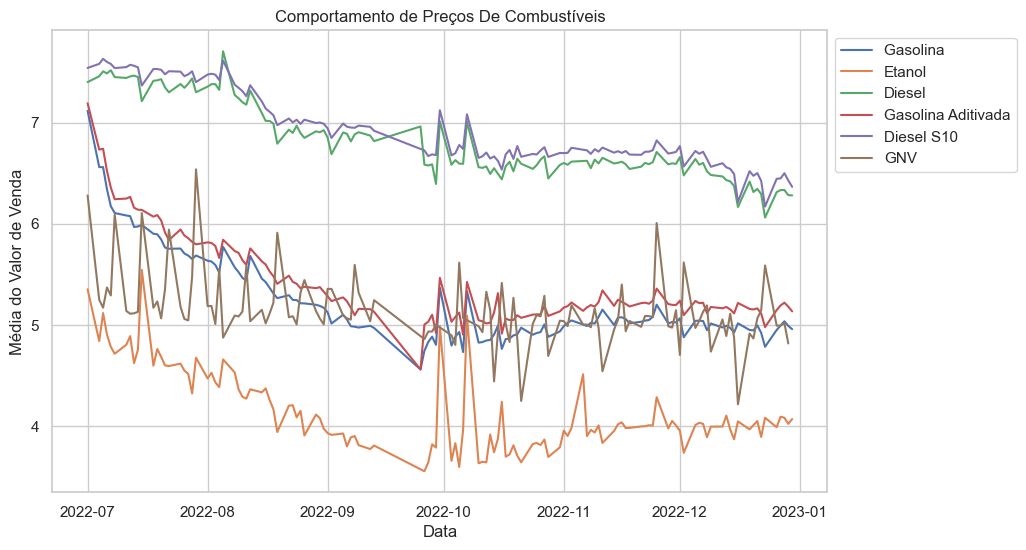

In [249]:
gasolina_agrupado = gasolina_df.groupby('Data da Coleta')['Valor Venda Real'].mean()
etanol_agrupado = etanol_df.groupby('Data da Coleta')['Valor Venda Real'].mean()
diesel_agrupado =  diesel_df.groupby('Data da Coleta')['Valor Venda Real'].mean()
gasolinaad_agrupado= gasolinaad_df.groupby('Data da Coleta')['Valor Venda Real'].mean()
dieselS10_agrupado = dieselS10_df.groupby('Data da Coleta')['Valor Venda Real'].mean()
gnv_agrupado = gnv_df.groupby('Data da Coleta')['Valor Venda Real'].mean()

# Plotar um gráfico de linha com as médias dos preços
plt.figure(figsize=(10, 6))
plt.plot(gasolina_agrupado.index, gasolina_agrupado.values, label='Gasolina ')
plt.plot(etanol_agrupado.index, etanol_agrupado.values, label='Etanol')
plt.plot(diesel_agrupado.index, diesel_agrupado.values, label='Diesel')
plt.plot(gasolinaad_agrupado.index, gasolinaad_agrupado.values, label='Gasolina Aditivada')
plt.plot(dieselS10_agrupado.index, dieselS10_agrupado.values, label='Diesel S10')
plt.plot(gnv_agrupado.index, gnv_agrupado.values, label='GNV')
plt.xlabel('Data')
plt.ylabel('Média do Valor de Venda')
plt.title('Comportamento de Preços De Combustíveis')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [250]:
# Traçar o mesmo gráfico com a plotly com interatividade

df_anp_agrupado = df_anp.groupby(['Produto','Data da Coleta'])['Valor Venda Real'].mean().reset_index()

fig = px.line(df_anp_agrupado, x='Data da Coleta', y='Valor Venda Real', color='Produto', markers=False,
              title='Evolução dos Preços por Produto')
fig.update_xaxes(title_text='Data de Coleta')
fig.update_yaxes(title_text='Valor de Venda')
fig.show()

#### Observação
Como esperado, notamos que os preços dos combustíveis derivados de petróleo seguem comportamentos semelhantes, visto que razões econômicas e de mercado podem afetar os preços desses produtos de maneira semelhante, como por exemplo:
* Mercado de Petróleo: Os preços dos combustíveis são influenciados em grande parte pelos preços do petróleo bruto, que é uma matéria-prima comum para a produção de gasolina, diesel e outros produtos refinados. Mudanças nos preços do petróleo globalmente tendem a ter um impacto semelhante nos preços de diferentes combustíveis.
* Políticas e Regulamentações: Políticas governamentais, regulamentações e incentivos fiscais também podem afetar os preços dos combustíveis de maneira semelhante, uma vez que essas políticas frequentemente abrangem vários tipos de combustíveis.

Já o GNV, por ser derivado de gás natural não tem seu preço inflenciado pelo preço do petróleo, tendo um comportamento diferente ao longo do tempo

Notamos que em out/2022 teve um aumento significativo o que está relacionado ao conflito entre Rússia e Ucrânia, que começou em fevereiro de 2022. O barril do petróleo ficou avaliado em US$ 139,38 no mercado internacional.A guerra na Ucrânia e as sanções ao petróleo da Rússia reforçaram ainda mais a pressão de inflação sobre os combustíveis, já que reduziram a oferta e prejudicaram as cadeias de distribuição. No Brasil, os combustíveis sofrem ainda com o aumento do dólar - *Fonte G1*

### Estatística gerais dos preços dos combustíveis em um intervalo específico

In [251]:
# Defina o intervalo de datas desejado
data_inicio = pd.to_datetime('2022-07-01')  
data_fim = pd.to_datetime('2022-12-31')

# Filtrar para o intervalo de datas desejado
intervalo_datas = df_anp[(df_anp['Data da Coleta'] >= data_inicio) & (df_anp['Data da Coleta'] <= data_fim)]

estatisticas = intervalo_datas.groupby('Produto')['Valor Venda Real'].agg(['min', 'max', 'mean', 'std']).reset_index()

estatisticas



,Produto,min,max,mean,std
0,DIESEL,3.127179,8.947054,6.948858,0.497767
1,DIESEL S10,3.606953,9.698492,7.065263,0.487171
2,ETANOL,2.501758,7.827381,4.198210,0.683939
3,GASOLINA,3.506480,8.708201,5.333418,0.549514
4,GASOLINA ADITIVADA,4.109314,9.206349,5.504444,0.564753
5,GNV,3.154762,7.926587,5.092980,0.577614


### Distribuição dos Valores de Gasolina em um período

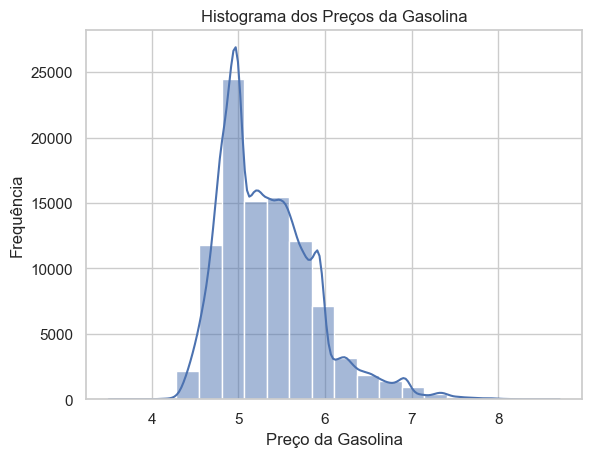

count    96323.000000
mean         5.333418
std          0.549514
min          3.506480
25%          4.914573
50%          5.244825
75%          5.644841
max          8.708201
Name: Valor Venda Real, dtype: float64

In [252]:
# Defina o intervalo de datas desejado
data_inicio = pd.to_datetime('2022-07-01')  
data_fim = pd.to_datetime('2022-12-31')

intervalo_datas = gasolina_df[(gasolina_df['Data da Coleta'] >= data_inicio) & (gasolina_df['Data da Coleta'] <= data_fim)]

precos_gasolina = intervalo_datas['Valor Venda Real']


# Criar o histograma
sns.set(style="whitegrid")
sns.histplot(precos_gasolina, bins=20, kde=True)  

# Configurar labels e título
plt.xlabel("Preço da Gasolina")
plt.ylabel("Frequência")
plt.title("Histograma dos Preços da Gasolina")

# Mostrar o gráfico
plt.show()
intervalo_datas['Valor Venda Real'].describe()



No segundo semestre de 2022, notamos que os valores da gasolina em sua maioria estão próximo a média, com um desvio padrão de 0.54

### Variações dos preços dos combustíveis a partir de uma data com o ano anterior

In [253]:
data_fim = pd.to_datetime('2022-12-31')  
data_inicio = data_fim - pd.DateOffset(years=1)

df_filtrado = df_anp[(df_anp['Data da Coleta'] >= data_inicio) & (df_anp['Data da Coleta'] <= data_fim)]

df_variacao = df_filtrado.groupby('Produto')['Valor Venda Real'].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)

# Somente para imprimir

df_variacao_tabela = pd.DataFrame({
       'Variação': df_variacao.apply(lambda x: f'{x:.2f}%')
})

data_inicio_formatada = data_inicio.strftime('%m/%Y')
data_fim_formatada = data_fim.strftime('%m/%Y')

# Imprime o novo DataFrame formatado
print('A variação dos preços dos combustíveis') 
print(f'No período de {data_inicio_formatada} a {data_fim_formatada} foi de:')
print(df_variacao_tabela)



A variação dos preços dos combustíveis
No período de 12/2021 a 12/2022 foi de:
                   Variação
Produto                    
DIESEL              -13.09%
DIESEL S10          -18.45%
ETANOL              -24.06%
GASOLINA            -30.13%
GASOLINA ADITIVADA  -28.08%
GNV                 -22.47%


### Análise por Região

In [254]:
# Defina o intervalo de datas desejado
data_inicio = pd.to_datetime('2022-07-01')  
data_fim = pd.to_datetime('2022-12-30')

# Filtrar para o intervalo de datas desejado
intervalo_datas = df_anp[(df_anp['Data da Coleta'] >= data_inicio) & (df_anp['Data da Coleta'] <= data_fim)]

df_regiao = intervalo_datas.groupby(['Produto', 'Regiao'])['Valor de Venda'].agg(['min', 'max', 'mean', 'std']).reset_index()



# Para imprimir
df_regiao.rename(columns={'min': 'Mínimo', 'max': 'Máximo', 'mean': 'Média', 'std': 'Desvio Padrão'}, inplace=True)

# Classificar o DataFrame primeiro pelo produto e depois pela média
df_regiao.sort_values(by=['Produto', 'Média'], ascending=[True, False], inplace=True)

# Redefinir os índices do DataFrame
df_regiao.reset_index(drop=True, inplace=True)

# Formatação das colunas numéricas como moeda brasileira
format_mapping = {
    'Mínimo': 'R$ {:,.2f}',
    'Máximo': 'R$ {:,.2f}',
    'Média': 'R$ {:,.2f}',
    'Desvio Padrão': '{:,.2f}'
}

df_regiao_formatted = df_regiao.copy()

# Aplicando a formatação às colunas numéricas
for col, fmt in format_mapping.items():
    df_regiao_formatted[col] = df_regiao_formatted[col].apply(fmt.format)

# Imprimindo o DataFrame formatado
print(df_regiao_formatted)


               Produto Regiao   Mínimo   Máximo    Média Desvio Padrão
0               DIESEL      N  R$ 4.62  R$ 9.00  R$ 7.33          0.56
1               DIESEL     NE  R$ 4.60  R$ 8.79  R$ 7.11          0.49
2               DIESEL     CO  R$ 4.65  R$ 8.60  R$ 6.99          0.49
3               DIESEL     SE  R$ 3.14  R$ 8.78  R$ 6.91          0.50
4               DIESEL      S  R$ 4.69  R$ 8.10  R$ 6.80          0.49
5           DIESEL S10      N  R$ 5.79  R$ 8.99  R$ 7.37          0.56
6           DIESEL S10     NE  R$ 5.57  R$ 8.99  R$ 7.16          0.49
7           DIESEL S10     CO  R$ 3.59  R$ 8.93  R$ 7.16          0.49
8           DIESEL S10     SE  R$ 5.49  R$ 9.65  R$ 7.04          0.50
9           DIESEL S10      S  R$ 5.46  R$ 8.71  R$ 6.94          0.49
10              ETANOL      N  R$ 3.50  R$ 7.50  R$ 4.82          0.72
11              ETANOL     NE  R$ 3.14  R$ 7.04  R$ 4.75          0.75
12              ETANOL      S  R$ 3.19  R$ 7.89  R$ 4.57          0.67
13    

In [235]:

# Criar o gráfico de colunas agrupadas usando o Plotly
fig = px.bar(df_regiao, x='Produto', y='Média', color='Regiao',
             title='Valor Médio por Região para cada Produto',
             labels={'Média': 'Valor Médio', 'Produto': ''},
             barmode='group',
             text='Média')
fig.update_traces(texttemplate='R$ %{text:.2f}', textposition='inside')  # Formatação dos valores e posição do texto


# Mostrar o gráfico
fig.show()

fig = px.bar(df_regiao, x='Produto', y='Mínimo', color='Regiao',
             title='Valor Mínimo por Região para cada Produto',
             labels={'Mínimo': 'Valor Mínimo', 'Produto': ''},
             barmode='group',
             text='Mínimo')
fig.update_traces(texttemplate='R$ %{text:.2f}', textposition='inside') 

# Mostrar o gráfico
fig.show()

fig = px.bar(df_regiao, x='Produto', y='Máximo', color='Regiao',
             title='Valor Máximo por Região para cada Produto',
             labels={'Máximo': 'Valor Máximo', 'Produto': ''},
             barmode='group',
             text='Máximo')
fig.update_traces(texttemplate='R$ %{text:.2f}', textposition='inside')

# Mostrar o gráfico
fig.show()




### Preço médio anual dos combustíveis

In [236]:
df_anp_media_anual= df_anp.groupby(['Ano','Produto'])['Valor Venda Real'].mean().reset_index()
display(df_anp_media)


,Ano,Produto,Valor Venda Real
0,2022,DIESEL,6.948858
1,2022,DIESEL S10,7.065263
2,2022,ETANOL,4.198210
3,2022,GASOLINA,5.333418
4,2022,GASOLINA ADITIVADA,5.504444
5,2022,GNV,5.092980


In [237]:
fig = px.bar(df_anp_media_anual, x='Ano', y='Valor Venda Real', color='Produto',
             title='Valor Médio Anual para cada Combustível',
             labels={'Valor Venda Real': 'Valor Médio', 'Ano': ''},
             barmode='group',
             text='Valor Venda Real')
fig.update_traces(texttemplate='R$ %{text:.2f}', textposition='inside')  # Formatação dos valores e posição do texto

In [238]:
df_anp_agrupado = df_anp.groupby(['Produto','Data da Coleta'])['Valor de Venda'].mean().reset_index()
display(df_anp_agrupado)

,Produto,Data da Coleta,Valor de Venda
0,DIESEL,2022-07-01,7.458889
1,DIESEL,2022-07-04,7.516846
2,DIESEL,2022-07-05,7.565717
3,DIESEL,2022-07-06,7.546076
4,DIESEL,2022-07-07,7.576971
...,...,...,...
741,GNV,2022-12-23,5.560000
742,GNV,2022-12-26,4.968898
743,GNV,2022-12-27,4.969000
744,GNV,2022-12-28,4.995094


In [239]:
df_2=df_anp.groupby(['Produto','Data da Coleta'])['Valor Venda Real'].mean().reset_index()
display(df_2)

,Produto,Data da Coleta,Valor Venda Real
0,DIESEL,2022-07-01,7.399691
1,DIESEL,2022-07-04,7.457188
2,DIESEL,2022-07-05,7.505672
3,DIESEL,2022-07-06,7.486186
4,DIESEL,2022-07-07,7.516836
...,...,...,...
741,GNV,2022-12-23,5.587940
742,GNV,2022-12-26,4.993868
743,GNV,2022-12-27,4.993970
744,GNV,2022-12-28,5.020195


### Agrupa os dados por Região, Estado, Produto e retorno o valor da média destes produtos

In [255]:
#display(df_anp)
df1_anp= df_anp.groupby(['Regiao','Estado','Produto'])['Valor de Venda'].mean().reset_index()
display(df1_anp)


,Regiao,Estado,Produto,Valor de Venda
0,CO,DF,DIESEL,6.879983
1,CO,DF,DIESEL S10,7.049044
2,CO,DF,ETANOL,4.174180
3,CO,DF,GASOLINA,5.244217
4,CO,DF,GASOLINA ADITIVADA,5.330923
...,...,...,...,...
148,SE,SP,DIESEL S10,7.020672
149,SE,SP,ETANOL,3.744513
150,SE,SP,GASOLINA,5.185755
151,SE,SP,GASOLINA ADITIVADA,5.410437


### Agrupa os dados pelo média destes produtos por região

In [241]:
df2_anp= df_anp.groupby(['Regiao', 'Produto'])['Valor de Venda'].mean().reset_index()
df2_anp

,Regiao,Produto,Valor de Venda
0,CO,DIESEL,6.991116
1,CO,DIESEL S10,7.155944
2,CO,ETANOL,3.861790
3,CO,GASOLINA,5.284771
4,CO,GASOLINA ADITIVADA,5.402851
5,CO,GNV,4.433333
6,N,DIESEL,7.326406
7,N,DIESEL S10,7.373135
8,N,ETANOL,4.815866
9,N,GASOLINA,5.520230
